In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Base.classes.keys()

['measurement', 'station']

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

temp_june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [6]:
# 2. Convert the June temperatures to a list.
temp_june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(temp_june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [7]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
temp_june_df = pd.DataFrame(temp_june, columns=["date","tobs"])
temp_june_df.set_index(temp_june_df['date'], inplace=True)
# print(temp_june_df)

In [8]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [9]:
# 5. Return to your challenge instructions to compare your summary statistics

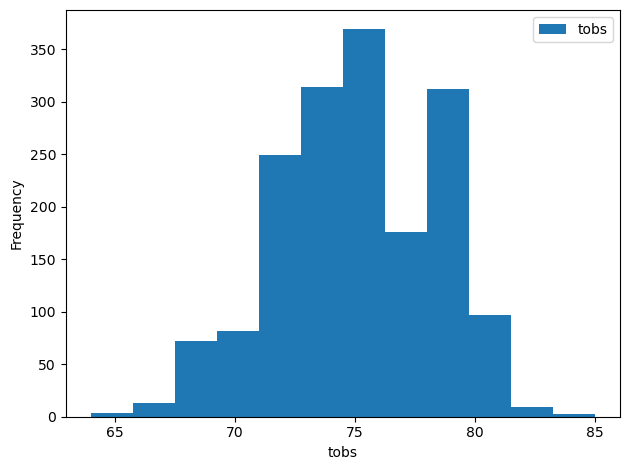

In [10]:
import matplotlib.pyplot as plt
temp_june_df.plot.hist(bins=12)
plt.xlabel("tobs")
plt.tight_layout()

<AxesSubplot:xlabel='date'>

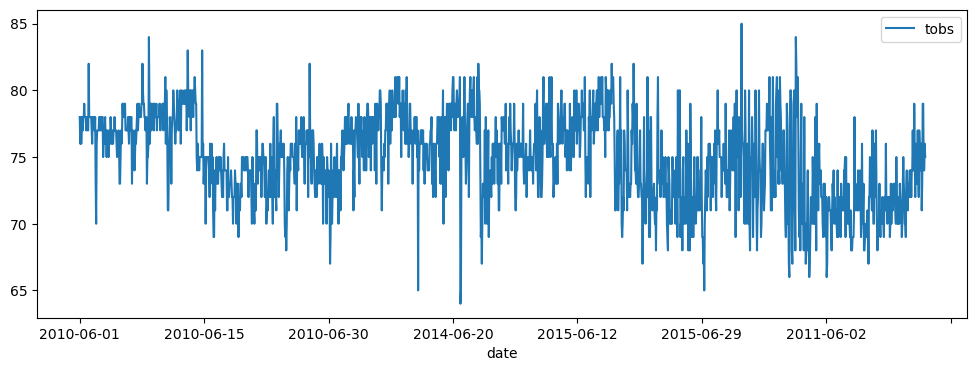

In [11]:
import matplotlib.pyplot as plt
temp_june_df.plot("date","tobs", figsize=(12, 4))

## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [13]:
# 7. Convert the December temperatures to a list.
temp_dec = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(temp_dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec_df = pd.DataFrame(temp_dec, columns=["date","tobs"])
temp_dec_df.set_index(temp_dec_df['date'], inplace=True)


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [16]:
# 10. Return to your challenge instructions to compare your summary statistics

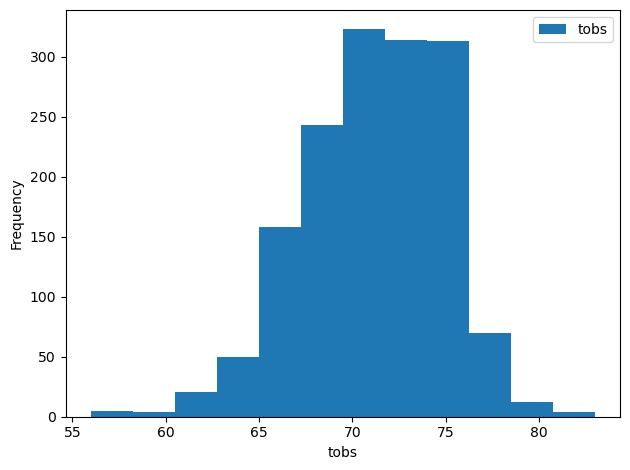

In [17]:
temp_dec_df.plot.hist(bins=12)
plt.xlabel("tobs")
plt.tight_layout()

<AxesSubplot:xlabel='date'>

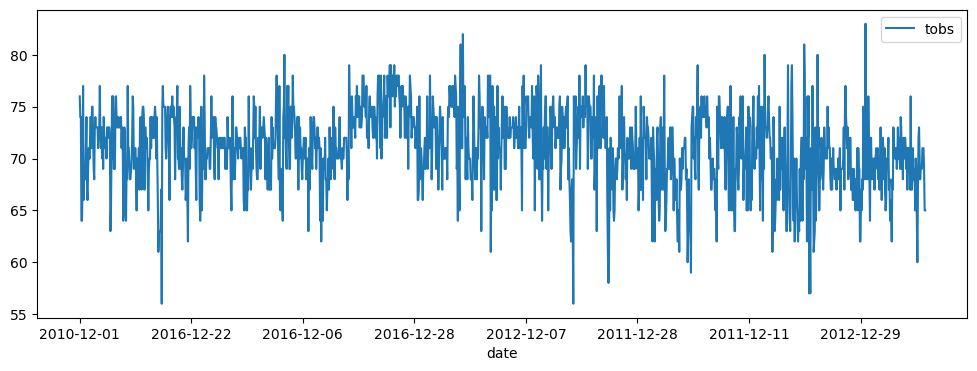

In [18]:
temp_dec_df.plot(figsize=(12, 4))

## D3: Additional Queries

In [19]:
# Design a query to retrieve the precipitation data for month of June
temp_prcp_june = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()

# Create a DataFrame from the list of precipitation for the month of June. 
temp_prcp_june_df = pd.DataFrame(temp_prcp_june, columns=["date","tobs","prcp"])
temp_prcp_june_df.set_index(temp_prcp_june_df['date'], inplace=True)

#Calculate and print out the summary statistics
temp_prcp_june_df.describe()


,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [20]:
# Design a query to retrieve the precipitation data for month of December
temp_prcp_dec = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()

# Create a DataFrame from the list of precipitation for the month of December. 
temp_prcp_dec_df = pd.DataFrame(temp_prcp_dec, columns=["date","tobs","prcp"])
temp_prcp_dec_df.set_index(temp_prcp_dec_df['date'], inplace=True)

#Calculate and print out the summary statistics
temp_prcp_dec_df.describe()


,tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000
